# Ford GoBike System Data
## by Victor Nomwesigwa

## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangling)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)

<a id='intro'></a>
## Introduction

For this project, we shall concentrate on visualizing the [Ford GoBike System data set](https://www.lyft.com/bikes/bay-wheels/system-data) that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Features included the data set are:
    - Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
    - Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
    - End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
    - Bike ID
    - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    - Member Year of Birth
    - Member Gender
    

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

%matplotlib inline

<a id='wrangling'></a>
## Preliminary Wrangling

### Gathering Data

In [2]:
# path to where the files are stored
path = './Ford-Bike-Data'

# store list of all files with the csv extension
all_files= glob.glob(os.path.join(path, "*.csv"))

# concatenate the data 
df = pd.concat((pd.read_csv(f, low_memory=False) for f in all_files), ignore_index = True, sort = True)

# store the data frame created in master_data.csv
df.to_csv('master_data.csv', index=False)

In [3]:
# load the dataset and read the first 5 rows
df_bikes = pd.read_csv('master_data.csv', low_memory = False)
df_bikes.head()

,Unnamed: 16,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,NaN,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,NaN,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,NaN,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,NaN,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,NaN,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,NaN,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,NaN,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,NaN,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,NaN,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


### Assessing Data

In [4]:
# get genral information about the data set
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038695 entries, 0 to 4038694
Data columns (total 18 columns):
Unnamed: 16                object
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(9)
memory usage: 554.6+ MB


In [5]:
# get statistical information
df_bikes.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,4.038695e+06,4.038695e+06,4.004252e+06,4.038695e+06,4.038695e+06,3.719681e+06,4.004980e+06,4.038695e+06,4.038695e+06
mean,6.462647e+03,8.644626e+02,1.230363e+02,3.776762e+01,-1.223502e+02,1.983449e+03,1.249896e+02,3.776763e+01,-1.223513e+02
std,4.639322e+04,2.367408e+03,1.061886e+02,1.307965e-01,2.987181e-01,1.041264e+01,1.064513e+02,1.054754e-01,1.623125e-01
min,1.000000e+01,6.000000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,1.878000e+03,3.000000e+00,0.000000e+00,-1.224737e+02
25%,1.285000e+03,3.540000e+02,3.000000e+01,3.777106e+01,-1.224108e+02,1.978000e+03,3.600000e+01,3.777106e+01,-1.224117e+02
50%,2.497000e+03,5.620000e+02,8.900000e+01,3.778107e+01,-1.223971e+02,1.986000e+03,9.000000e+01,3.778107e+01,-1.223974e+02
75%,3.660000e+03,8.800000e+02,1.940000e+02,3.779728e+01,-1.222914e+02,1.991000e+03,1.950000e+02,3.779591e+01,-1.222912e+02
max,9.969630e+05,8.636900e+04,4.590000e+02,4.551000e+01,0.000000e+00,2.001000e+03,4.590000e+02,4.551000e+01,0.000000e+00


In [6]:
# study the unnamed column 16 that was created
df_bikes['Unnamed: 16'].value_counts()

app        25815
clipper     3809
Name: Unnamed: 16, dtype: int64

In [7]:
type(df_bikes['Unnamed: 16'][0])

float

In [8]:
type(df_bikes['bike_share_for_all_trip'][0])

str

In [9]:
type(df_bikes['end_time'][0])

str

In [10]:
type(df_bikes['member_gender'][0])

str

In [11]:
type(df_bikes['rental_access_method'][0])

float

In [12]:
type(df_bikes['start_station_name'][0])

str

In [13]:
type(df_bikes['start_time'][0])

str

In [14]:
type(df_bikes['user_type'][0])

str

In [15]:
# study the unnamed column 16 that was created
df_bikes['member_gender'].value_counts()

Male      2742688
Female     891597
Other       60424
M           19885
F            5076
?            2589
O             456
Name: member_gender, dtype: int64

In [16]:
df_bikes['user_type'].value_counts()

Subscriber    3389168
Customer       649527
Name: user_type, dtype: int64

In [17]:
# check for duplicates
df_bikes.duplicated().sum()

0

In [18]:
df_bikes['member_birth_year'].value_counts()

1988.0    211588
1989.0    184798
1987.0    179285
1990.0    176408
1991.0    170294
           ...  
1886.0         3
1906.0         2
1903.0         1
1910.0         1
1919.0         1
Name: member_birth_year, Length: 96, dtype: int64

In [19]:
df_bikes.isnull().sum(axis=0)

Unnamed: 16                4009071
bike_id                          0
bike_share_for_all_trip     553217
duration_sec                     0
end_station_id               34443
end_station_latitude             0
end_station_longitude            0
end_station_name             34440
end_time                         0
member_birth_year           319014
member_gender               315980
rental_access_method       4034802
start_station_id             33715
start_station_latitude           0
start_station_longitude          0
start_station_name           33711
start_time                       0
user_type                        0
dtype: int64

#### Quality Issues
- The data set has columns that are not needed to this analysis
- member_gender has values that represent the same thing but labeled differently for example `Male` and `M` both represent males in the data set
- `start_time` and `end_time` have a string data instead of datetime
- `member_birth_year` has years dating as far back as 1886
- user type, gender and bike_share_for_all_trip can be set to category

### Cleaning Data

In [20]:
# make a copy of data to be cleaned
df_bikes_copy = df_bikes.copy()

#### Quality Issue 1: The data set has columns that are not needed to this analysis

#### Define: Remove columns that are not needed for this analysis

#### Code

In [21]:
df_bikes_copy.drop(['Unnamed: 16', 'rental_access_method'], axis=1, inplace=True)

#### Test

In [22]:
df_bikes_copy.columns

Index(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'member_birth_year', 'member_gender', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

#### Quality Issue 2: member_gender has values that represent the same thing but labeled differently for example Male and M both represent males in the data set

#### Define: Rename all values in column member_gender that represent the same thing. The ? gender can be replaced with undisclosed

#### Code

In [23]:
df_bikes_copy['member_gender'].replace('M', 'Male',inplace = True)
df_bikes_copy['member_gender'].replace('F', 'Female',inplace = True)
df_bikes_copy['member_gender'].replace('O', 'Other',inplace = True)
df_bikes_copy['member_gender'].replace('?', 'Undisclosed',inplace = True)

#### Test

In [24]:
df_bikes_copy['member_gender'].value_counts()

Male           2762573
Female          896673
Other            60880
Undisclosed       2589
Name: member_gender, dtype: int64

#### Quality Issue 3: start_time and end_time have a string data instead of datetime

#### Define: change data type for start_time and end_time

#### Code

In [25]:
df_bikes_copy['start_time'] = pd.to_datetime(df_bikes_copy['start_time'])
df_bikes_copy['end_time'] = pd.to_datetime(df_bikes_copy['end_time'])

#### Test

In [26]:
type(df_bikes_copy['end_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
type(df_bikes_copy['start_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Quality Issue 4: member_birth_year has years dating as far back as 1886

#### Define: Assuming that most seniors stop riding bikes at the age of 65, we shall remove all records of ages above 65. 

#### Code

In [28]:
# calculate age
df_bikes_copy['member_age'] = 2019-df_bikes_copy['member_birth_year']

In [29]:
df_bikes_copy = df_bikes_copy.query('member_age <=65')

#### Test

In [30]:
df_bikes_copy.member_age.value_counts()

31.0    211588
30.0    184798
32.0    179285
29.0    176408
28.0    170294
26.0    167555
34.0    162645
33.0    160611
27.0    155031
35.0    147975
25.0    141065
36.0    133614
37.0    127525
24.0    122455
39.0    104589
38.0    103493
23.0     83425
40.0     81983
42.0     75990
41.0     73027
44.0     66743
45.0     58911
22.0     58840
43.0     58697
46.0     52693
48.0     49931
51.0     49793
21.0     48949
47.0     44844
54.0     43950
49.0     42238
50.0     37707
52.0     34286
20.0     32890
56.0     31217
55.0     26950
53.0     26370
57.0     25381
58.0     21901
59.0     18745
60.0     16860
61.0     16343
19.0     15832
62.0     13412
63.0     11633
65.0      8504
64.0      5947
18.0      1349
Name: member_age, dtype: int64

#### Quality Issue 5: user_type, gender and bike_share_for_all_trip can be set to category

#### Define: change data type for user_type, member_gender, bike_share_for_all_trip to category

#### Code

In [31]:
df_bikes_copy.user_type = df_bikes_copy.user_type.astype('category')
df_bikes_copy.member_gender = df_bikes_copy.member_gender.astype('category')
df_bikes_copy.bike_share_for_all_trip = df_bikes_copy.bike_share_for_all_trip.astype('category')

#### Test

In [32]:
df_bikes_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3684272 entries, 0 to 4038694
Data columns (total 17 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
member_age                 float64
dtypes: category(3), datetime64[ns](2), float64(8), int64(2), object(2)
memory usage: 432.2+ MB


#### Extract cleaning day of the week, month, time of the day from start_time and end_time

In [33]:
# start time month
df_bikes_copy['start_time_month'] = df_bikes_copy['start_time'].dt.strftime('%B')

In [34]:
# start time weekday
df_bikes_copy['start_time_weekday'] = df_bikes_copy['start_time'].dt.strftime('%a')

In [35]:
# start time day
df_bikes_copy['start_time_day']=df_bikes_copy['start_time'].dt.day.astype(int)

In [36]:
#start time hour
df_bikes_copy['start_time_hour']=df_bikes_copy['start_time'].dt.hour

In [37]:
# start time month number
df_bikes_copy['start_time_month_no']=df_bikes_copy['start_time'].dt.month.astype(int)

In [38]:
# end time month
df_bikes_copy['end_time_month'] = df_bikes_copy['end_time'].dt.strftime('%B')

In [39]:
# end time weekday
df_bikes_copy['end_time_weekday'] = df_bikes_copy['end_time'].dt.strftime('%a')

In [40]:
# end time day
df_bikes_copy['end_time_day']=df_bikes_copy['end_time'].dt.day.astype(int)

In [41]:
#end time hour
df_bikes_copy['end_time_hour']=df_bikes_copy['end_time'].dt.hour

In [42]:
# end time month number
df_bikes_copy['end_time_month_no']=df_bikes_copy['end_time'].dt.month.astype(int)

In [43]:
# make a copy of the clean dataframe
df_master = df_bikes_copy.copy()

### Storing

In [44]:
# Store the clean DataFrame in a CSV file with the main one named df_bikes_master.csv.
df_master.to_csv('df_bikes_master.csv', index= False, encoding='utf-8')

### What is the structure of the dataset?

> The data set includes multiple csv files from 2017, 2018 and the last 8 months in 2019 with 4038695 rows and 18 features.

### What are the main features of interest in the dataset?

    - How long does the average trip take?
    - Is the trip duration affected by weather( months/seasons)?
    - Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support the investigation into the feature(s) of interest?

> Trip Duration (seconds), Start Time and Date , End Time and Date, User Type 

<a id='univariate'></a>
## Univariate Exploration

Let's start our exploration by looking at how long the average trip takes. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

Text(0, 0.5, 'Bike Trips')

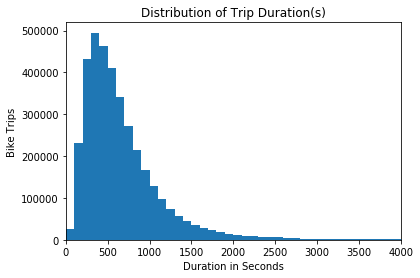

In [45]:
# univariate plot of trip duration in sec
bin_edges = np.arange(0 , df_master['duration_sec'].max()+100 , 100)
plt.hist(data = df_master , x = 'duration_sec', bins = bin_edges);
plt.xlim(0,4000)
plt.title('Distribution of Trip Duration(s)')
plt.xlabel('Duration in Seconds')
plt.ylabel('Bike Trips')

We have created a histogram since `duration_sec` is a numeric variable. Our plot shows a highly right skewed distribution. We also observe that there is a long tail on the right and we shall explore that by trying a log scaling.

Note, measuring trips is seconds is unreasonable and can be difficult to deal with. Let us first convert the seconds to minutes before doing the log transformation.

In [46]:
df_master['duration_min'] = df_master['duration_sec']/60

In [47]:
df_master.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_time_weekday,start_time_day,start_time_hour,start_time_month_no,end_time_month,end_time_weekday,end_time_day,end_time_hour,end_time_month_no,duration_min
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988.0,Male,...,Wed,28,23,2,March,Thu,1,0,3,9.966667
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,1987.0,Male,...,Wed,28,23,2,February,Wed,28,23,2,15.716667
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,1986.0,Female,...,Wed,28,18,2,February,Wed,28,23,2,309.783333
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,1981.0,Male,...,Wed,28,18,2,February,Wed,28,23,2,309.300000
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.608,1976.0,Female,...,Wed,28,23,2,February,Wed,28,23,2,14.750000


Text(0, 0.5, 'Bike Trips')

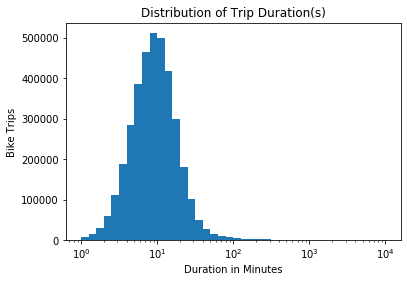

In [48]:
# log transformation

bin_edges = 10**np.arange(0, 4+0.1 , 0.1)  
# 0 means 10^0 is the start point, 4 means 10^4 is the ending point , 10^0.1 is the gap
# do i need to increase the max tick
ticks = [0.1 , 0.4 , 1 , 4 , 10 , 40 , 100 , 400]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_master , x = 'duration_min', bins = bin_edges);
plt.title('Distribution of Trip Duration(s)')
plt.xticks(ticks,labels)
plt.xlabel('Duration in Minutes')
plt.xscale('log');
plt.ylabel('Bike Trips')

Under a log scale, we should see that the data is roughly symmetric and that most people take short trips of about 10 min.

<a id='bivariate'></a>
## Bivariate Exploration

In this section, we shall investigate relationships between pairs of variables in our data. 
First, let's explore and discover if the trip duration is affected by weather( months/seasons)?

In [49]:
df_master.start_time_month.value_counts()

August       418047
July         385615
June         355148
April        346920
March        344012
May          337657
October      285272
February     270957
January      266430
September    259263
November     212760
December     202191
Name: start_time_month, dtype: int64

To start we shall construct a plot of duration_min against start_time_month. What kind of shape does the relationship between these variables take?

Text(0, 0.5, 'Duration in Minutes')

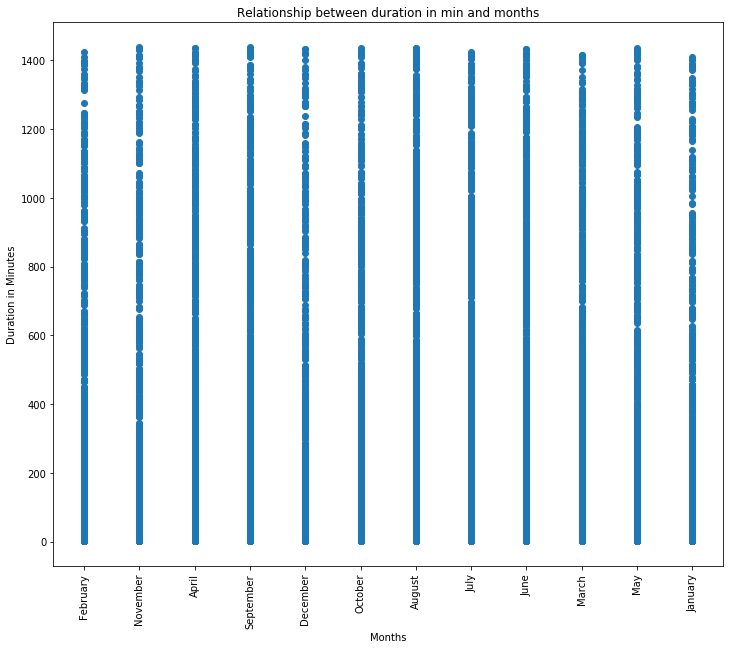

In [50]:
# bivariate plot of duration_min vs. start_time_month
plt.figure(figsize = [12, 10])
base_color = sb.color_palette()[0]
plt.scatter(data = df_master , x = 'start_time_month' , y = 'duration_min')
plt.title('Relationship between duration in min and months')
plt.xticks(rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Duration in Minutes')

Since these are both numeric variables, a scatterplot is a natural choice. We should recall that the duration_min distribution suggests a logarithmic transformation due to its very long tail. We can try taking a different look with a heat map.

Text(0.5, 1.0, 'Relationship between duration in min and months')

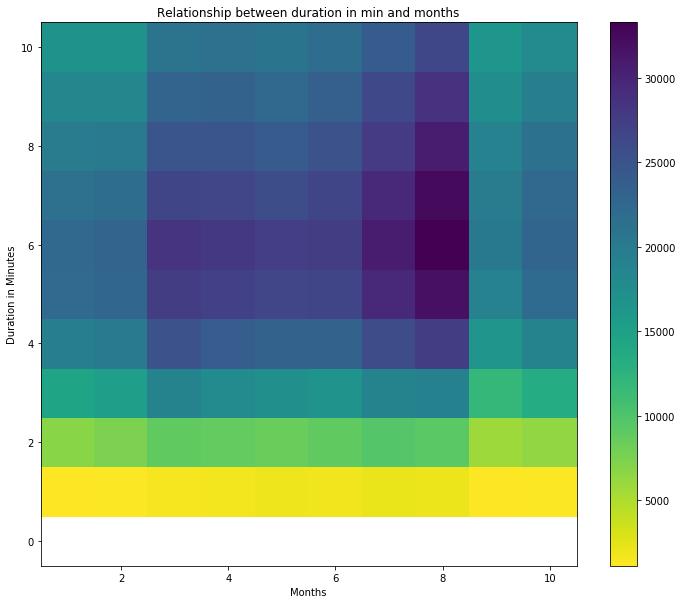

In [51]:
plt.figure(figsize = [12, 10])
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = df_master, x = 'start_time_month_no', y = 'duration_min',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Months')
plt.ylabel('Duration in Minutes')
plt.title('Relationship between duration in min and months')

From the heat map above, we notice that most trips are taken at the start of June and end of August. Which suggests that the longest trip durations happen during the summer. We can further explore this by taking a look at the distribution of different weather seasons i.e. Spring, Summer, Autumn and Winter.

In [52]:
# Create 4 categories of weather seasons
spring = df_master.query('start_time_month_no in ["3" , "4" , "5"]' ).duration_min.mean ()
summer = df_master.query('start_time_month_no in ["6" , "7" , "8"] ').duration_min.mean()
autumn = df_master.query('start_time_month_no in ["9" , "10" , "11"]').duration_min.mean()
winter = df_master.query('start_time_month_no in ["12" , "1" , "2"]').duration_min.mean()

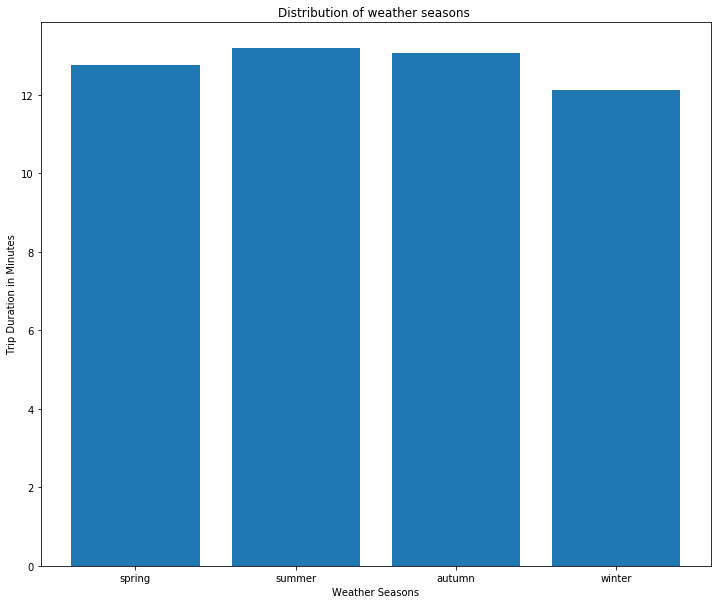

In [53]:
plt.figure(figsize = [12, 10])
plt.bar(['spring','summer','autumn','winter'],[spring , summer , autumn , winter] )
plt.title('Distribution of weather seasons ')
plt.xlabel('Weather Seasons')
plt.ylabel('Trip Duration in Minutes');

As observed previously, we can conclude that the longest trip durations happen during summer. We also observe that the differences in trip duration between the other seasons does not change much. This may be attributed to the weather in San Francisco which is mostly warm and dry during Summer (Jun–Aug), with chilly fog mornings and evenings and Winter (Dec–Feb) is cool and rainy.

<a id='multivariate'></a>
## Multivariate Exploration

> In this section we shall create plots of three or more variables to investigate our data even further. We shall be exploring to understand if the previous bivariate analysis depends on if a user is a subscriber or customer. For example, does a high trip duration in the summer depend on if a user is a subscriber or a customer.

<Figure size 864x720 with 0 Axes>

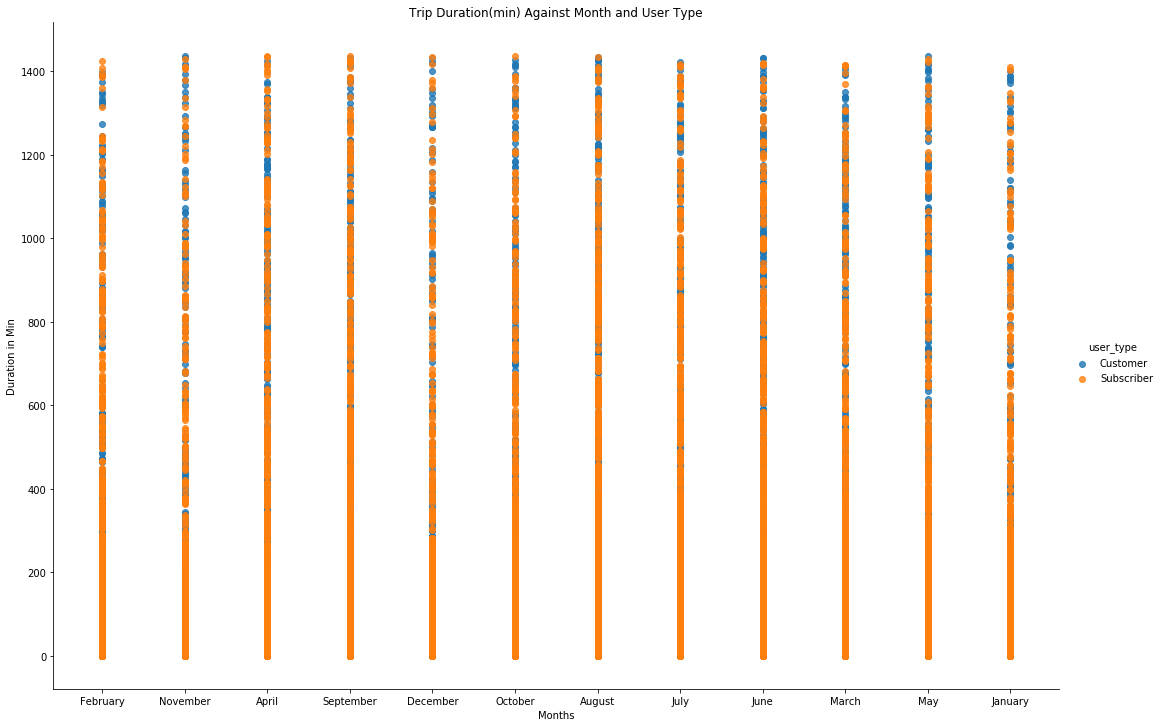

In [54]:
# multivariate plot of duration_min by month, and user type
plt.figure(figsize = [12, 10])
g = sb.FacetGrid( data = df_master, hue = 'user_type',height = 10, aspect=1.5 )
g = g.map(sb.regplot, 'start_time_month' ,'duration_min' , fit_reg = False);
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Months')
plt.ylabel('Duration in Min');

The above plot suggests that there are far more customers than subscribers. Therefore, it is safe to conclude that user type does not impact trip duration. However, we also observe that subscribed users rent bikes for longer trips of above 300 min.